# MultiLayer Analysis

In [1]:
# run conda activate multilayer
import multinetx as mx
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 

In [2]:
N = 50
g1 = mx.barabasi_albert_graph(N, 2)
g2 = mx.barabasi_albert_graph(N, 2)
g3 = mx.barabasi_albert_graph(N, 2)

In [3]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3])

In [4]:
mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

/users/k/karmimy/anaconda3/envs/multilayer/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/users/k/karmimy/anaconda3/envs/multilayer/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/users/k/karmimy/anaconda3/envs/multilayer/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


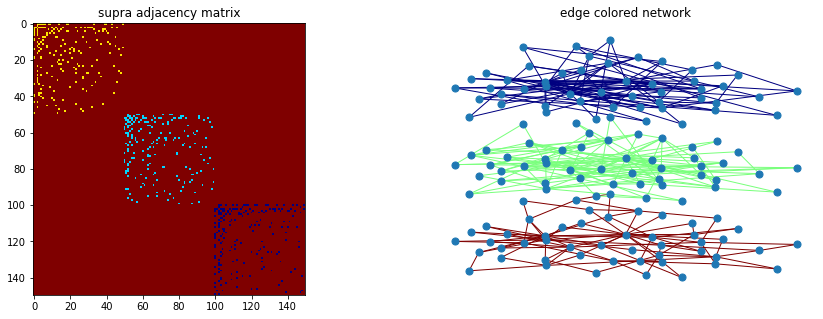

In [5]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
		  origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(g1),
					  layer_vertical_shift=0.2,
					  layer_horizontal_shift=0.0,
					  proj_angle=47)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
				 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
				 edge_cmap=plt.cm.jet_r)
plt.show()

In [6]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
#adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23
adj_block += adj_block.T

In [7]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3], 
						inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=4)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

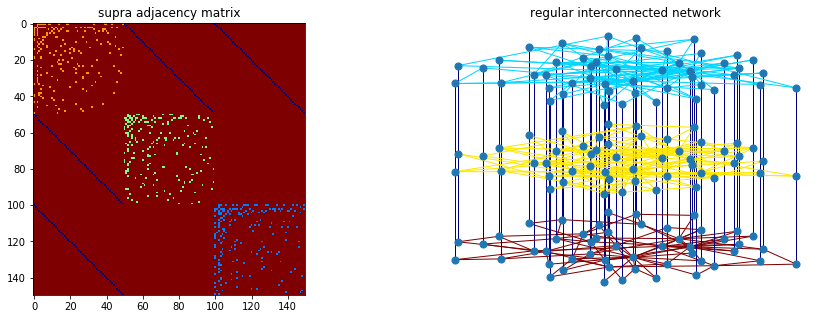

In [8]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
		  origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('regular interconnected network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
					  layer_vertical_shift=1.4,
					  layer_horizontal_shift=0.0,
					  proj_angle=7)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
				 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
				 edge_cmap=plt.cm.jet_r)
plt.show()

In [9]:
adj_block

<150x150 sparse matrix of type '<class 'numpy.float64'>'
	with 200 stored elements in List of Lists format>

In [10]:
nx.algebraic_connectivity(nx.from_scipy_sparse_matrix(adj_block))

0.0

In [11]:
adj_block
G = nx.from_scipy_sparse_matrix(adj_block)

In [12]:
nx.is_connected(G)

False

In [13]:
is_undirected = not nx.is_directed(G)

In [14]:
is_undirected

True